In [4]:
import pandas as pd
df = pd.read_csv("D:/python_practice/Datasets/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df = df.drop(labels=['id'],axis=1)

In [6]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [7]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [8]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [9]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:

## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [12]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


C:\Users\91956\AppData\Local\Temp\ipykernel_6848\1530830137.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['num_pipeline__carat'])


<Axes: xlabel='num_pipeline__carat', ylabel='Density'>

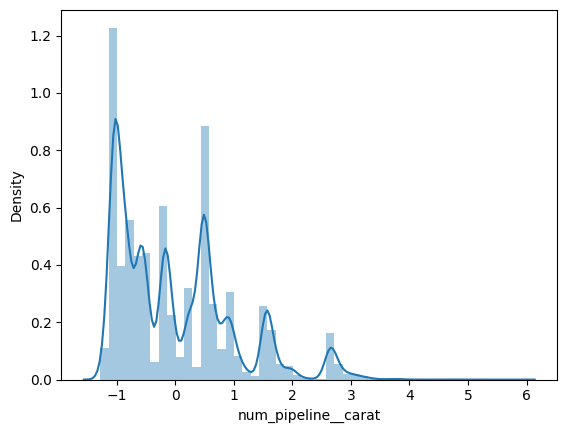

In [31]:
import seaborn as sns
sns.distplot(X_train['num_pipeline__carat'])

In [14]:
##Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [15]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
regression.coef_

array([[ 6433.66003594,  -132.75843566,   -70.42922179, -1720.30971463,
         -499.29302619,   -63.39317848,    72.44537247,  -460.41604642,
          650.76431652]])

In [17]:
regression.intercept_

array([3970.76628955])

In [18]:
import numpy as np
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)
    return mae,mse,r2_square


In [19]:
##Train multiple models
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}
#train_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i] 
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    mae,rmse,r2_square=evaluate_model(y_test,y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    #train_model_list.append(models.values()[i])

    print("model training performance")
    print("rmse:",rmse)
    print("mae:",mae)
    print('r2 square:',r2_square)

    r2_list.append(r2_square)

    print('='*30)
    print('\n')



LinearRegression
model training performance
rmse: 1028002.7598132559
mae: 674.0255115796836
r2 square: 0.9368908248567511


Lasso
model training performance
rmse: 1027949.4559693959
mae: 675.071692336216
r2 square: 0.9368940971841704


Ridge
model training performance
rmse: 1028005.2293677601
mae: 674.0555800798154
r2 square: 0.9368906732505942


ElasticNet
model training performance
rmse: 2351365.382289642
mae: 1060.7368759154729
r2 square: 0.8556494831165181




In [20]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet']

In [38]:
b=1
try:
    a=1
    print(a+b)
except:
    print("can not perform addition")

2
